Make exponential decay figs for conductance secion

In [90]:
import numpy as np
import lmfit as lmf
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import os
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#to make fonts from plots look normal
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Calibri'
mpl.rcParams['mathtext.it'] = 'Calibri:italic'
mpl.rcParams['mathtext.bf'] = 'Calibri:bold'

font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 36}
        #'sans-serif' : 'Arial Unicode MS'}
mpl.rc('font', **font)
plt.rc('font', size=36)          # controls default text sizes

#mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
mpl.rcParams['lines.markersize'] = 16
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
#mpl.rcParams['xtick.top'] = False
#mpl.rcParams['ytick.right'] = False

# indicate the figures directory
figDir = r'C:\Users\Eric\Desktop\ThesisIntroFigs\conductance_Figs'

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


2.18504852916 0.103189906019


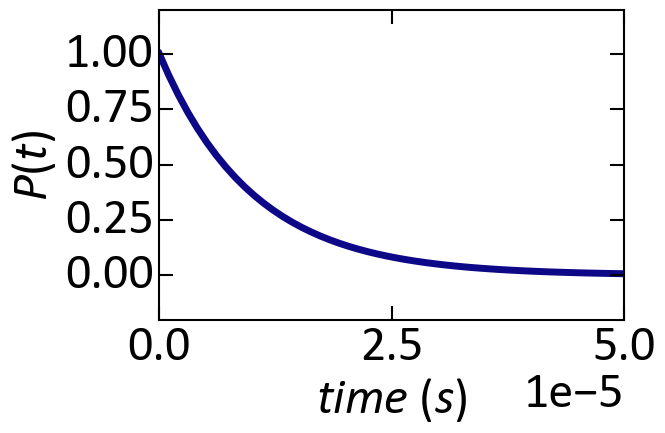

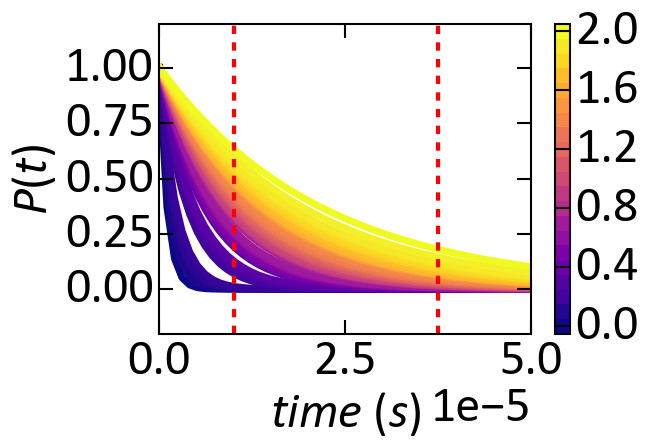

In [119]:
# single exponential

tau = 1e-5
t = np.linspace(0,5e-5,num = 50)

p0 = 1
p1 = p0*np.exp(-t/tau)

fig,ax = plt.subplots(1,1)
ax.plot(t,p1,color = tuple(colSet[0]), linestyle = '-', linewidth = 5)
ax.set_xlabel("$time$ ($s$)")
ax.set_ylabel("$P(t)$")
# ax.set_xscale("log") 
# ax.set_yscale("log")
ax.set_xlim([0,5e-5])
ax.set_ylim([-0.2,1.2])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(6))
figName = '\\hopProb_single.png'
plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

colSet = (cm.plasma(np.linspace(0,1,50)))
cmap1 = plt.get_cmap('plasma',50)


tauArray = np.random.normal(1e-5,4e-6,50)
tauArray = np.sort(tauArray)

tauMax = max(tauArray)
tauMin = min(tauArray)
tauMaxN =tauMax/1e-5
tauMinN = tauMin/1e-5

print(tauMaxN,tauMinN)

pArray = np.zeros((np.size(t),np.size(tauArray)))

for tau in range(0,np.size(tauArray)):
    pArray[tau] = p0*np.exp(-t/tauArray[tau])

# np.size(tauArray)
# print(np.size(pArray[0]))

# cmap1 = tuple(map(tuple, colSet))



fig,ax = plt.subplots(1,1)
for tau in range (0,np.size(tauArray)):
    ax.plot(t,pArray[tau],linestyle = '-',linewidth = 5,color = tuple(colSet[tau]))
plt.axvline(1e-5,color = 'r',linestyle = '--',linewidth = 3)
plt.axvline(3.75e-5,color = 'r',linestyle = '--',linewidth = 3)
# plt.colorbar(tauArray)
ax.set_xlabel("$time$ ($s$)")
ax.set_ylabel("$P(t)$")
# ax.set_xscale("log") 
# ax.set_yscale("log")
ax.set_xlim([0,5e-5])
ax.set_ylim([-0.2,1.2])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(6))

norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0,2,6), 
             boundaries=np.arange(-0.05,2.1,.1))

figName = '\\hopProb_all.png'
plt.savefig(figDir + figName,dpi = 300,bbox_inches = 'tight')

In [121]:
print(1/3.75e-5)

26666.666666666668
